In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Lấy đường dẫn của thư mục hiện tại
current_directory = os.getcwd()

# Lấy đường dẫn của thư mục cha
parent_directory = os.path.dirname(current_directory)

# Tạo đường dẫn đầy đủ tới file CSV
csv_path = os.path.join(parent_directory, "Processed\\CartoonNetworkAsia_81Post_Processed.csv")

# Đọc file CSV
df = pd.read_csv(csv_path)

In [12]:
# thêm index cho dataframe
df = df.reset_index(inplace = False)
df["index"] = df["index"] + 1

In [13]:
df

,index,post_id,post_text,likes,comments,shares,reaction_count,like,love,wow,angry,haha,care,sad,hour,date,day
0,1,738496031649666,Celebrate #WB100 with sunset movies under the ...,37,0,0,45,37,6.0,1.0,1.0,0.0,0.0,0.0,11,2023-11-06,Monday
1,2,738486251650644,Unlock your Barbie and Chelsea alter ego! Try ...,14,2,1,16,14,1.0,0.0,0.0,1.0,0.0,0.0,11,2023-11-06,Monday
2,3,736838365148766,Looks like Tom won't be fishing in the Singapo...,7,4,19,10,7,0.0,0.0,0.0,3.0,0.0,0.0,19,2023-11-05,Sunday
3,4,737572781741991,The chase is on in the Singapore Botanic Garde...,453,14,68,789,453,170.0,2.0,4.0,140.0,18.0,2.0,19,2023-11-04,Saturday
4,5,736877231811546,Ready to rock some outdoor superhero moves? ⚡️...,83,0,6,122,83,32.0,2.0,1.0,1.0,3.0,0.0,10,2023-11-03,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,681911200641483,The claws are out this August with Cat-stravag...,429,28,54,571,429,121.0,4.0,1.0,3.0,13.0,0.0,10,2023-08-01,Tuesday
76,77,681542050678398,Toontastic Kenergy all around 💯 Which of these...,228,20,63,466,228,172.0,1.0,0.0,58.0,7.0,0.0,19,2023-07-31,Monday
77,78,681350087364261,Celebrate the 9 lives of Cats with Cat-stravag...,125,8,7,198,125,66.0,1.0,0.0,0.0,6.0,0.0,11,2023-07-31,Monday
78,79,681290900703513,The iconic chase continues between Tom and Jer...,3309,281,1000,6216,3309,2069.0,45.0,31.0,33.0,127.0,602.0,9,2023-07-31,Monday


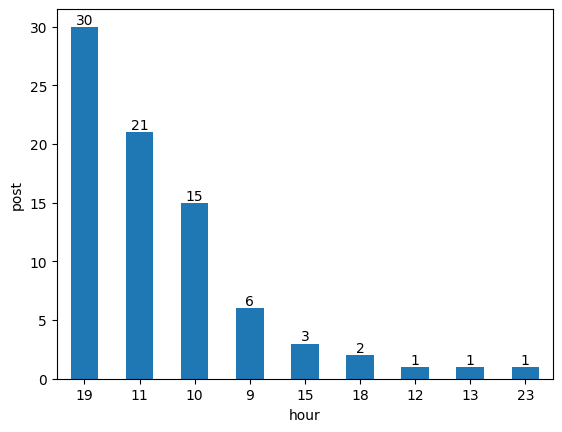

In [14]:
# số bài đăng theo giờ
hour_plt = df.hour.value_counts().plot(kind = "bar", ylabel = 'post', rot = 0)

for b in hour_plt.patches:
    hour_plt.annotate(b.get_height(), (b.get_x() + b.get_width() / 2, b.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')

plt.show()

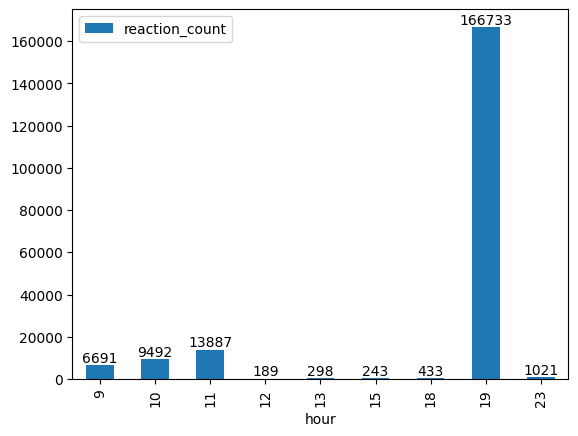

In [15]:
# số reaction theo giờ
hour_react_plt = df[['hour', 'reaction_count']].groupby(['hour']).sum('reaction_count').plot(kind = 'bar')

for b in hour_react_plt.patches:
    hour_react_plt.annotate(str(b.get_height()), (b.get_x() + b.get_width() / 2., b.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

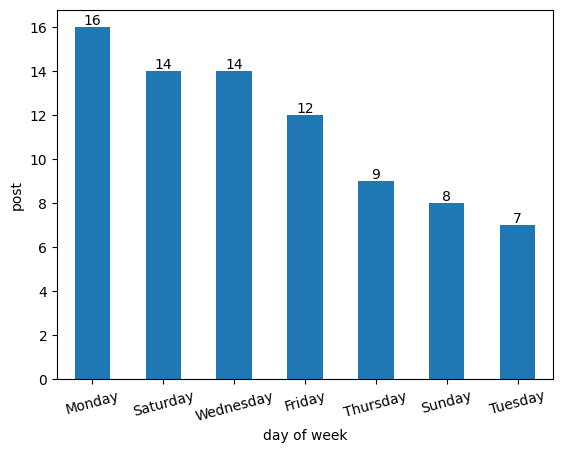

In [16]:
# số bài đăng theo thứ
day_plt = df.day.value_counts().plot(kind = "bar", xlabel = 'day of week', ylabel = 'post', rot = 15)

for b in day_plt.patches:
    day_plt.annotate(b.get_height(), (b.get_x() + b.get_width() / 2, b.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')

plt.show()

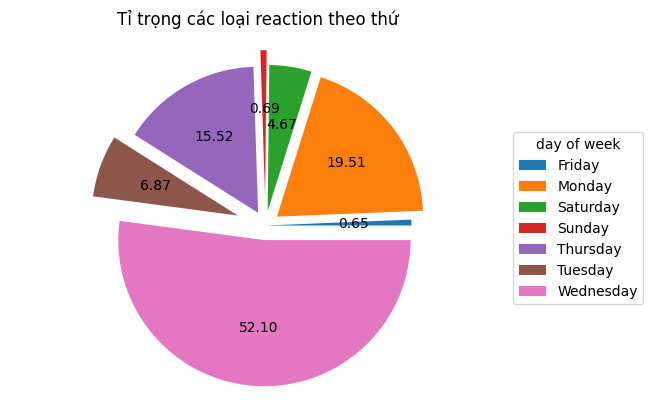

In [17]:
# tỉ trọng reaction theo thứ
day_react = df[['day', 'reaction_count']].groupby(['day']).sum('reaction_count')

explode = (0.0, 0.1, 0.1, 0.2, 0.1, 0.2, 0.1)

plt.pie(day_react.reaction_count, labels = ['']*len(day_react.index), autopct = '%.2f', explode = explode)

plt.axis('equal')
plt.title("Tỉ trọng các loại reaction theo thứ")

plt.legend(day_react.index, title="day of week", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
day_react

,reaction_count
day,
Friday,1289
Monday,38820
Saturday,9285
Sunday,1368
Thursday,30882
Tuesday,13665
Wednesday,103678
